## Исследование пользователей сервиса аренды самокатов GoFast

Есть сервис аренды самокатов GoFast.Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  
* с подпиской Ultra  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно.  
  
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display, HTML

### 1. Загрузка данных

In [2]:
df_users_go = pd.read_csv(r'C:\Users\alina\Python_my_files\users_go.csv', sep=',')

In [3]:
df_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
df_rides_go = pd.read_csv(r'C:\Users\alina\Python_my_files\rides_go.csv', sep=',')

In [6]:
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
df_subscriptions_go = pd.read_csv(r'C:\Users\alina\Python_my_files\subscriptions_go.csv', sep=',')

In [9]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
df_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### 2. Предобработка данных

#### Проверю наличие пропущенных значений и дубликатов в датафреймах

In [11]:
# Вставляю стиль для жирного шрифта
display(HTML("<style>.bold-text { font-weight: bold; }</style>"))

display(HTML("<b>Пользователи</b>"))
display(df_users_go.head())
print('Пропуски')
display(df_users_go.isna().sum())
print('Дубликаты')
display(df_users_go.duplicated().sum())
print('Дубликаты id пользователей')
display(df_users_go['user_id'].duplicated().sum())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Пропуски


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Дубликаты


31

Дубликаты id пользователей


31

#### Удалю дубликаты из исходного датафрейма

In [12]:
df_users_go.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
df_users_go.duplicated().sum()

0

In [14]:
display(HTML("<b>Поездки</b>"))
display(df_rides_go.head())
print('Пропуски')
display(df_rides_go.isna().sum())
print('Дубликаты')
display(df_rides_go.duplicated().sum())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Пропуски


user_id     0
distance    0
duration    0
date        0
dtype: int64

Дубликаты


0

#### Изменю формат даты

In [15]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])

#### Проверю, какие встречаются даты, а также значения расстояния и продолжительности поездок

In [16]:
print('Дата')
display(df_rides_go['date'].describe())

Дата


C:\Users\alina\AppData\Local\Temp/ipykernel_31248/3335799540.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df_rides_go['date'].describe())


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

Данные за 2021 год, с 1 января по 30 декабря

In [17]:
print('Расстояние поездки, м')
display(df_rides_go['distance'].describe())

Расстояние поездки, м


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [18]:
df_rides_go[['distance', 'duration']].query('distance < 10')

,distance,duration
7841,7.097072,10.026614
8658,6.784447,6.015656
9541,2.570787,3.011018
11555,0.855683,10.001902
13690,4.329506,4.008958


In [19]:
print('Продолжительность поездки, мин')
display(df_rides_go['duration'].describe())

Продолжительность поездки, мин


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [20]:
df_rides_go.query('duration < 2')['duration'].unique()

array([0.5])

In [21]:
df_rides_go.query('duration < 2').shape[0]

95

In [22]:
df_rides_go.query('duration < 2').head()

,user_id,distance,duration,date
6531,701,4196.445201,0.5,2021-08-31
6570,704,4830.824371,0.5,2021-10-14
6680,712,4684.004397,0.5,2021-03-04
6695,713,5215.642710,0.5,2021-02-25
6768,718,5197.436649,0.5,2021-02-11


При достаточно больших дистанциях у 95 пользователей проставлено время 0,5 мин. Видимо, это техническая ошибка. Буду учитывать это в дальнейшем

#### Создам новый столбец с номером месяца на основе столбца date

In [23]:
df_rides_go['month_number'] = df_rides_go['date'].dt.month
df_rides_go.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### 3. Исследовательский анализ данных

#### Частота встречаемости городов

In [24]:
city_counts = df_users_go['city'].value_counts().sort_values(ascending=False)
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

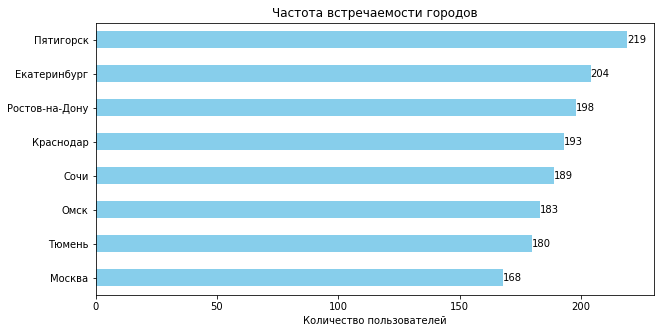

In [25]:
plt.subplots(figsize=(10, 5))

# Создание горизонтального барчарта
ax = city_counts.plot.barh(color='skyblue')

# Настройка осей и заголовков
ax.invert_yaxis()  # Преобразую ось Y для удобства чтения
ax.set_xlabel('Количество пользователей')
ax.set_title('Частота встречаемости городов')

# Добавляю метки значений на столбики
for i, v in enumerate(city_counts.values):
    ax.text(v, i, str(v), va='center', color='black')

plt.show()

#### Соотношение пользователей с подпиской и без подписки

In [26]:
percentages = (df_users_go['subscription_type'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'
pd.concat([df_users_go['subscription_type'].value_counts(), percentages], axis=1, keys=['Count', 'Percentage'])

,Count,Percentage
free,835,54.4%
ultra,699,45.6%


На текущий момент доля подписчиков составляет 45,6%

#### Возраст пользователей



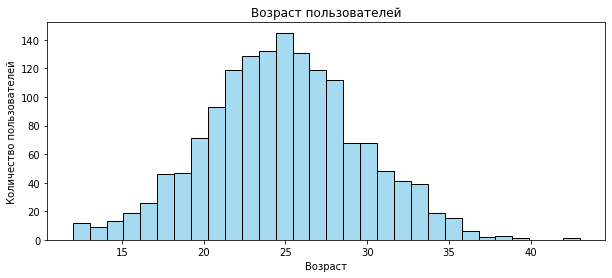

In [27]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_users_go, x='age', color='skyblue').set_title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

In [28]:
print('Средний возраст пользователей сервиса - ', round(df_users_go['age'].mean()))

Средний возраст пользователей сервиса -  25


#### Расстояние, которое пользователь преодолел за одну поездку



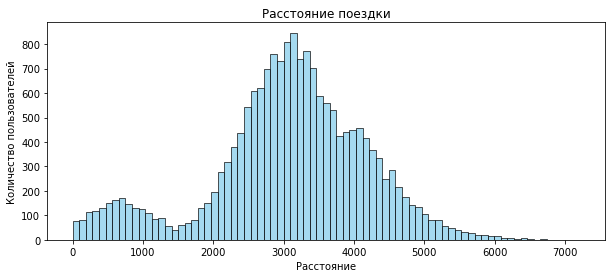

In [29]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_rides_go, x='distance', color='skyblue').set_title('Расстояние поездки')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

In [30]:
round(df_rides_go['distance'].mean())

3071

In [31]:
round(df_rides_go['distance'].median())

3134

В среднем пользователи за раз проезжают около 3,1 км

#### Продолжительность поездок

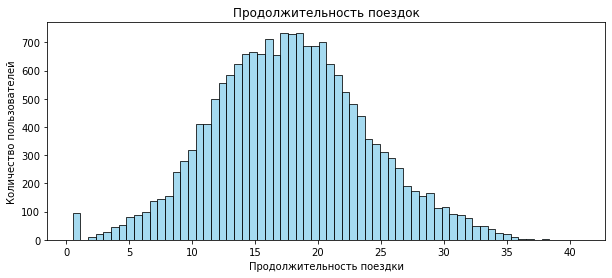

In [32]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df_rides_go, x='duration', color='skyblue').set_title('Продолжительность поездок')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')
plt.show()

In [33]:
print('В среднем продолжительность одной поездки составляет ', round(df_rides_go.query('duration > 1')['duration'].mean()), 'мин.')

В среднем продолжительность одной поездки составляет  18 мин.


### 4. Объединение данных

In [34]:
df = df_users_go.merge(df_rides_go, how='left', on ='user_id')
df = df.merge(df_subscriptions_go, how='left', on ='subscription_type')
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


#### Проверю, что количество записей до объединения такое же, как и после

In [35]:
df_rides_go.shape[0] == df.shape[0]

True

#### Проверю, что по-прежнему нет пропусков

In [36]:
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_number         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

#### Создам ещё два датафрейма из датафрейма выше:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

In [37]:
df_free = df.query('subscription_type == "free"')
df_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [38]:
df_ultra = df.query('subscription_type == "ultra"')
df_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


#### Визуализирую информацию о расстоянии и времени поездок для пользователей обеих категорий

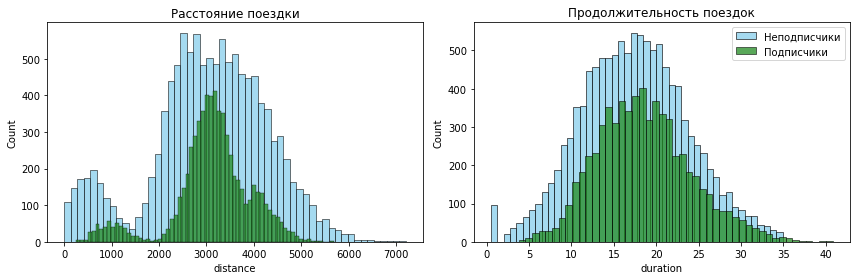

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=df_free, x='distance', ax=ax1, color='skyblue').set_title('Расстояние поездки')
sns.histplot(data=df_ultra, x='distance', ax=ax1, color = 'forestgreen').set_title('Расстояние поездки')
sns.histplot(data=df_free, x='duration', ax=ax2, color='skyblue').set_title('Продолжительность поездок')
sns.histplot(data=df_ultra, x='duration', ax=ax2, color = 'forestgreen').set_title('Продолжительность поездок')
plt.legend(labels=['Неподписчики', 'Подписчики'])
plt.tight_layout()
plt.show()

### 5. Подсчёт выручки

#### Посчитаю стоимость каждой поездки. Продолжительность каждой поездки при этом округляется вверх, до следующего целого числа

In [40]:
df['price'] = df['subscription_fee'] + df['start_ride_price'] + df['minute_price'] * np.ceil(df['duration'])
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee,price
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,355.0
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,295.0
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,241.0
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,313.0
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,361.0


#### Создам датафрейм с агрегированными данными о поездках: найду суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [41]:
aggregated_df = df.query('duration > 1') \
                .groupby(['user_id', 'subscription_type', 'month_number'], as_index=False) \
                .agg({'distance': 'sum', 'date': 'count', 'duration': 'sum', 'price': 'sum'}) \
                .rename(columns={'distance': 'distance_sum',
                                'date': 'rides_count',
                                'duration': 'duration_sum',
                                'price': 'revenue'}) \
                .sort_values(['user_id', 'month_number'], ascending = True)

# Округление значений
aggregated_df = aggregated_df.round({'distance_sum': 1, 'duration_sum': 1})

aggregated_df.head()

,user_id,subscription_type,month_number,distance_sum,rides_count,duration_sum,revenue
0,1,ultra,1,7027.5,2,41.4,650.0
1,1,ultra,4,754.2,1,6.2,241.0
2,1,ultra,8,6723.5,2,44.8,674.0
3,1,ultra,10,5809.9,2,31.6,590.0
4,1,ultra,11,7003.5,3,53.4,933.0


### 6. Проверка гипотез

In [42]:
alpha = 0.05

#### 1) Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.


H0: Пользователи с подпиской тратят в среднем столько же времени на поездки, сколько и пользователи без подписки  
H1:Пользователи с подпиской тратят в среднем больше времени на поездки, чем пользователи без подписки

In [43]:
df_free.query('duration > 1').shape[0]

11473

In [44]:
df_ultra.query('duration > 1').shape[0]

6500

Выборки пользователей не равны по размеру

In [55]:
print('Среднее выборки пользователей без подписки: ', df_free.query('duration > 1')['duration'].mean())
print('Среднее выборки пользователей с подпиской: ', df_ultra.query('duration > 1')['duration'].mean())

results = st.ttest_ind(df_free.query('duration > 1')['duration'],
                       df_ultra.query('duration > 1')['duration'],
                       equal_var = False,
                       alternative ='less')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее выборки пользователей без подписки:  17.530771268800223
Среднее выборки пользователей с подпиской:  18.541985162805805
p-value:  1.6162210195310587e-29
Отвергаем нулевую гипотезу


**Вывод:** Пользователи с подпиской тратят больше времени на поездку.

#### 2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 



H0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130  метров  
H1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку > 3130 метров

In [46]:
value = 3130

In [47]:
print('Среднее выборки: ', df_ultra['distance'].mean())

results = st.ttest_1samp(df_ultra['distance'], value, alternative='greater')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее выборки:  3115.445388037025
p-value:  0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:** Пользователи с подпиской в среднем проезжают за одну поездку расстояние, не превышающее 3 130 метров.

#### 3) Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?



H0: Средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручке от пользователей без подписки  
H1:Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки

In [48]:
aggregated_df.query('subscription_type == "free"').shape[0]

6767

In [49]:
aggregated_df.query('subscription_type == "ultra"').shape[0]

4533

Выборки пользователей не равны по размеру

In [54]:
print('Среднее выборки пользователей без подписки: ', aggregated_df.query('subscription_type == "free"')['revenue'].mean())
print('Среднее выборки пользователей с подпиской: ', aggregated_df.query('subscription_type == "ultra"')['revenue'].mean())

results = st.ttest_ind(aggregated_df.query('subscription_type == "free"')['revenue'],
                       aggregated_df.query('subscription_type == "ultra"')['revenue'],
                       equal_var = False,
                       alternative ='less')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее выборки пользователей без подписки:  329.3326437121324
Среднее выборки пользователей с подпиской:  449.14405470990516
p-value:  9.793854017241494e-191
Отвергаем нулевую гипотезу


**Вывод:** Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

#### 4) Tехническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?

Двухвыборочный t-тест для зависимых выборок:  
result = st.ttest_rel(sample_before, sample_after, alternative = 'greater'

### 7. Распределения

#### 1) Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %?

In [51]:
# Целевое количество продлений
k = 100

# Вероятность успеха (продления подписки)
p = 0.1

# Функция для вычисления вероятности неудачи (не достигнуть цели)
def prob_failure(n):
    return st.binom.cdf(k-1, n, p)

# Поиск минимального n, при котором вероятность неудачи меньше 0.05
n_min = 1
while prob_failure(n_min) > 0.05:
    n_min += 1

print(f"Минимальное количество промокодов: {n_min}")

Минимальное количество промокодов: 1161


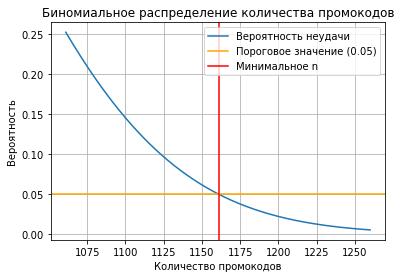

In [56]:
n_range = np.arange(n_min - 100, n_min + 100)  # Диапазон n

# Вычисление вероятности неудачи (менее k успехов)
prob_failure = list(map(lambda n: st.binom.cdf(k-1, n, p), n_range))

plt.plot(n_range, prob_failure, label='Вероятность неудачи')
plt.axhline(y=0.05, color='orange', label='Пороговое значение (0.05)')
plt.axvline(x=n_min, color='red', label='Минимальное n')
plt.xlabel('Количество промокодов')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение количества промокодов')
plt.legend()
plt.grid()
plt.show()

#### 2) Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. Какая вероятность того, что уведомление откроют не более 399,5 тыс. пользователей?

In [ ]:
n = 1_000_000  # Количество уведомлений
p = 0.4        # Вероятность открытия уведомления
k = 399_500    # Целевое количество пользователей
mu = n * p      # Среднее значение
sigma2 = n * p * (1 - p)  # Дисперсия
sigma = np.sqrt(sigma2)  # Стандартное отклонение

left_tail_probability = round(st.norm.cdf(k, mu, sigma), 3)
print(f"Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {left_tail_probability}")

### Выводы

* Больше всего пользователей сервиса в Пятигорске. Средний возраст пользователей - 25 лет. Одна поездка в среднем занимает 18 минут, а ее расстояние 3,1 км.
* Пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки. Помесячная выручка от пользователей с подпиской также выше, чем выручка от пользователей без подписки. При этом в среднем они проезжают за одну поездку расстояние, не превышающее оптимальное с точки зрения износа самоката (3 130 метров). Значит пользователи с подпиской выгоднее.  
* Сейчас пользователей с подпиской меньше, чем без неё (46% против 54%). Чтобы с 95% вероятностью выполнить план по увеличению количества подписок на 100 штук, нужно разослать как минимум 1 161 промокод на бесплатную месячную подписку (около 10% пользователей после бесплатного пробного периода продлевают подписку).